In [2]:
!pip install fredapi

In [187]:
import pandas as pd
import numpy as np
import yfinance as yf
from fredapi import Fred
import matplotlib.pyplot as plt

# Making tables easier to read 
pd.set_option("display.max_columns", 50) 
pd.set_option("display.width", 120)

# For my investment universe, this project will mainly bve focused on US sectors
etf_tickers = [
    "SPY",  # S&P 500 (broad US market)
    "XLK",  # Technology
    "XLF",  # Financials
    "XLE",  # Energy
    "XLV",  # Health Care
    "XLY",  # Consumer Discretionary
    "XLP",  # Consumer Staples
    "XLI",  # Industrials
    "XLB",  # Materials
    "XLU",  # Utilities
    "XLRE", # Real Estate
]

In [188]:
etf_tickers

['SPY', 'XLK', 'XLF', 'XLE', 'XLV', 'XLY', 'XLP', 'XLI', 'XLB', 'XLU', 'XLRE']

In [189]:
# Using Fred API to get macro-economic data 
from fredapi import Fred

fred = Fred(api_key= '2f1b1cfc8b5b76f195b2d95345d2859b')

if fred is None:
    raise ValueError(
        "FRED_API_KEY not found."
        "or replace fred_api_key with your key string."
    )

fred

In [190]:
# I will use ETF prices and build monthly returns  
start_date = "1995-01-01" 

# Resample those daily prices to month-end prices 
data = yf.download(
    etf_tickers, 
    start = start_date, 
    auto_adjust = True, # This will adjust for any splits / dividends 
    progress = False 
)

print("Columns returned by yfinance:")
print(data.columns)

Columns returned by yfinance:
MultiIndex([( 'Close',  'SPY'),
            ( 'Close',  'XLB'),
            ( 'Close',  'XLE'),
            ( 'Close',  'XLF'),
            ( 'Close',  'XLI'),
            ( 'Close',  'XLK'),
            ( 'Close',  'XLP'),
            ( 'Close', 'XLRE'),
            ( 'Close',  'XLU'),
            ( 'Close',  'XLV'),
            ( 'Close',  'XLY'),
            (  'High',  'SPY'),
            (  'High',  'XLB'),
            (  'High',  'XLE'),
            (  'High',  'XLF'),
            (  'High',  'XLI'),
            (  'High',  'XLK'),
            (  'High',  'XLP'),
            (  'High', 'XLRE'),
            (  'High',  'XLU'),
            (  'High',  'XLV'),
            (  'High',  'XLY'),
            (   'Low',  'SPY'),
            (   'Low',  'XLB'),
            (   'Low',  'XLE'),
            (   'Low',  'XLF'),
            (   'Low',  'XLI'),
            (   'Low',  'XLK'),
            (   'Low',  'XLP'),
            (   'Low', 'XLRE'),
          

In [215]:
# For multiple tickers, columns are a MultiIndex: first level = field, second = ticker
# We want the adjusted close prices, which are now under 'Close'
raw_prices = data["Close"]

print("\nRaw daily price data shape:", raw_prices.shape)
display(raw_prices.head())


Raw daily price data shape: (7784, 11)


Ticker,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
1995-01-03,26.662899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-04,26.790291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-05,26.790291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-06,26.817614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-09,26.844908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
# Resample to month-end prices
monthly_prices = raw_prices.resample("ME").last()
print("\nMonthly price data shape:", monthly_prices.shape)
display(monthly_prices.head())

# Compute simple monthly returns
# This gives us the first month where all 10 ETFs simulanously have valid prices - around 2003 
monthly_rets = monthly_prices.pct_change().dropna() 
print("\nMonthly returns shape:", monthly_rets.shape)
display(monthly_rets.head())


Monthly price data shape: (372, 11)


Ticker,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
1995-01-31,27.427303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-02-28,28.546614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-03-31,29.341545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-04-30,30.210735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-05-31,31.409275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Monthly returns shape: (122, 11)


Ticker,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2015-11-30,0.003655,0.009938,-0.000147,0.019933,0.008660,0.007102,-0.009222,-0.006462,-0.021257,-0.003224,-0.002346
2015-12-31,-0.017283,-0.043400,-0.105170,-0.023644,-0.025724,-0.020811,0.029176,0.025327,0.021192,0.017229,-0.028431
2016-01-31,-0.049787,-0.107094,-0.034980,-0.088543,-0.056971,-0.037123,0.005348,-0.063943,0.049445,-0.077190,-0.051817
2016-02-29,-0.000826,0.078153,-0.028002,-0.029006,0.042608,-0.006547,0.003152,0.004796,0.019375,-0.003611,0.004453
2016-03-31,0.067266,0.075731,0.101659,0.071591,0.069735,0.088217,0.047383,0.106971,0.079764,0.027075,0.066975


In [217]:
# Download raw macro series from FRED and resample that to monthly 
# I will be using below as the factors from my factor model 
fred_series = {
    "INDPRO":   "INDPRO",     # Industrial Production Index
    "UNRATE":   "UNRATE",     # Unemployment rate
    "CPI":      "CPIAUCSL",   # CPI, all urban consumers
    "FEDFUNDS": "FEDFUNDS",   # Fed Funds Rate
    "T10Y2Y":   "T10Y2Y",     # 10Y - 2Y Treasury yield curve
    "VIX":      "VIXCLS",     # VIX index
    "BAA":      "BAA",        # Moody's Baa corporate yield
    "M2":       "M2SL",       # M2 money stock
    "WALCL":    "WALCL",      # Fed balance sheet total assets
    "USD":      "DTWEXBGS",   # Broad USD index
}

macro_raw = pd.DataFrame()

# Appending data into macro_raw dataframe 
for col_name, fred_id in fred_series.items():
    print(f"Downloading {col_name} ({fred_id}) from FRED:") 
    s = fred.get_series(fred_id)
    s.name = col_name 
    macro_raw = pd.concat([macro_raw, s], axis = 1)

print("\nRaw macro data (mixed frequencies):")
print(macro_raw.shape)
display(macro_raw.head())

# Making sure the index is a DateTimeIndex so that resampling works 
print("\nIndex type before conversion:", type(macro_raw.index))
print("First few index values:", list(macro_raw.index[:5]))

# Convert to DatetimeIndex (in case it's plain Index of strings or something else)
macro_raw.index = pd.to_datetime(macro_raw.index)

print("\nIndex type AFTER conversion:", type(macro_raw.index))
print("First few index values after conversion:", list(macro_raw.index[:5]))

# Now it's safe to resample to month-end
macro_monthly = macro_raw.resample("ME").last()

print("\nMacro data resampled to month-end:")
print(macro_monthly.shape)
display(macro_monthly.head())


Raw macro data (mixed frequencies):
(13776, 10)


,INDPRO,UNRATE,CPI,FEDFUNDS,T10Y2Y,VIX,BAA,M2,WALCL,USD
1919-01-01 00:00:00,4.8739,NaN,NaN,NaN,NaN,NaN,7.12,NaN,NaN,NaN
1919-02-01 00:00:00,4.6585,NaN,NaN,NaN,NaN,NaN,7.20,NaN,NaN,NaN
1919-03-01 00:00:00,4.5238,NaN,NaN,NaN,NaN,NaN,7.15,NaN,NaN,NaN
1919-04-01 00:00:00,4.6046,NaN,NaN,NaN,NaN,NaN,7.23,NaN,NaN,NaN
1919-05-01 00:00:00,4.6315,NaN,NaN,NaN,NaN,NaN,7.09,NaN,NaN,NaN



Index type before conversion: <class 'pandas.core.indexes.base.Index'>
First few index values: [Timestamp('1919-01-01 00:00:00'), Timestamp('1919-02-01 00:00:00'), Timestamp('1919-03-01 00:00:00'), Timestamp('1919-04-01 00:00:00'), Timestamp('1919-05-01 00:00:00')]

Index type AFTER conversion: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few index values after conversion: [Timestamp('1919-01-01 00:00:00'), Timestamp('1919-02-01 00:00:00'), Timestamp('1919-03-01 00:00:00'), Timestamp('1919-04-01 00:00:00'), Timestamp('1919-05-01 00:00:00')]

Macro data resampled to month-end:
(1284, 10)


,INDPRO,UNRATE,CPI,FEDFUNDS,T10Y2Y,VIX,BAA,M2,WALCL,USD
1919-01-31,4.8739,NaN,NaN,NaN,NaN,NaN,7.12,NaN,NaN,NaN
1919-02-28,4.6585,NaN,NaN,NaN,NaN,NaN,7.20,NaN,NaN,NaN
1919-03-31,4.5238,NaN,NaN,NaN,NaN,NaN,7.15,NaN,NaN,NaN
1919-04-30,4.6046,NaN,NaN,NaN,NaN,NaN,7.23,NaN,NaN,NaN
1919-05-31,4.6315,NaN,NaN,NaN,NaN,NaN,7.09,NaN,NaN,NaN


In [218]:
# Aligning macro data ETF returns on common monthly dates 
# (Re)compute prices/returns with 'ME' just to be consistent everywhere
monthly_prices = raw_prices.resample("ME").last()
monthly_rets = monthly_prices.pct_change().dropna()

In [241]:
# Find common dates between returns and macro data
common_index = monthly_rets.index.intersection(macro_monthly.index)

# Reindex both datasets to this common index
monthly_rets_aligned = monthly_rets.reindex(common_index)
macro_monthly_aligned = macro_monthly.reindex(common_index)

print("Monthly returns shape (aligned):", monthly_rets_aligned.shape)
print("Macro monthly data shape (aligned):", macro_monthly_aligned.shape)
print("Common date range:", common_index.min(), "to", common_index.max())

print("\nSample of ETF monthly returns (aligned):")
display(monthly_rets_aligned.head())

print("\nSample of macro monthly data (aligned):")
display(macro_monthly_aligned.head())

Monthly returns shape (aligned): (122, 11)
Macro monthly data shape (aligned): (122, 10)
Common date range: 2015-11-30 00:00:00 to 2025-12-31 00:00:00

Sample of ETF monthly returns (aligned):


Ticker,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
2015-11-30,0.003655,0.009938,-0.000147,0.019933,0.008660,0.007102,-0.009222,-0.006462,-0.021257,-0.003224,-0.002346
2015-12-31,-0.017283,-0.043400,-0.105170,-0.023644,-0.025724,-0.020811,0.029176,0.025327,0.021192,0.017229,-0.028431
2016-01-31,-0.049787,-0.107094,-0.034980,-0.088543,-0.056971,-0.037123,0.005348,-0.063943,0.049445,-0.077190,-0.051817
2016-02-29,-0.000826,0.078153,-0.028002,-0.029006,0.042608,-0.006547,0.003152,0.004796,0.019375,-0.003611,0.004453
2016-03-31,0.067266,0.075731,0.101659,0.071591,0.069735,0.088217,0.047383,0.106971,0.079764,0.027075,0.066975



Sample of macro monthly data (aligned):


,INDPRO,UNRATE,CPI,FEDFUNDS,T10Y2Y,VIX,BAA,M2,WALCL,USD
2015-11-30,99.5298,5.1,238.017,0.12,1.27,16.13,5.46,12296.9,4477088.0,112.3400
2015-12-31,99.0417,5.0,237.761,0.24,1.21,18.21,5.46,12368.2,4486587.0,113.3429
2016-01-31,99.5607,4.8,237.652,0.34,1.18,20.20,5.45,12505.5,4482349.0,115.5731
2016-02-29,99.0445,4.9,237.336,0.38,0.96,20.55,5.34,12577.7,4489796.0,114.2418
2016-03-31,98.3096,5.0,238.080,0.36,1.05,13.95,5.13,12628.6,4482840.0,109.9191


In [220]:
macro = macro_monthly   
macro_factors = pd.DataFrame(index=macro.index)

In [221]:
# Growth Factors
# 1. Industrial Production YoY (%) 
macro_factors["IP_YOY"] = macro["INDPRO"].pct_change(12, fill_method=None) * 100.0

# 2. 6-month change in IP YoY (acceleration / decerleration 
macro_factors["IP_YOY_Δ6m"] = macro_factors["IP_YOY"] - macro_factors["IP_YOY"].shift(6)

# Labour Market Factors 
# 3. Unemployment rate gap: current UNRATE minus 5-year (60-month) rolling mean
macro_factors["UNRATE_GAP"] = macro["UNRATE"] - macro["UNRATE"].rolling(60).mean()

# Inflation Factors 
# 4. CPI YoY (%)
macro_factors["CPI_YOY"] = macro["CPI"].pct_change(12, fill_method=None) * 100.0

# 5. 6-month change in CPI YoY
macro_factors["CPI_YOY_Δ6m"] = macro_factors["CPI_YOY"] - macro_factors["CPI_YOY"].shift(6)

# Policy Stance Factors 
# 6. Real policy rate: Fed Funds minus CPI YoY
macro_factors["REAL_FF"] = macro["FEDFUNDS"] - macro_factors["CPI_YOY"]

# Yield Curve Factors 
# 7. Z-score of 10Y–2Y spread over a 10-year (120-month) rolling window
t10y2y_roll_mean = macro["T10Y2Y"].rolling(120).mean()
t10y2y_roll_std  = macro["T10Y2Y"].rolling(120).std()
macro_factors["T10Y2Y_Z"] = (macro["T10Y2Y"] - t10y2y_roll_mean) / t10y2y_roll_std

# Risk Apetite Factors 
# 8. VIX z-score over a 2-year (24-month) rolling window
vix_roll_mean = macro["VIX"].rolling(24).mean()
vix_roll_std  = macro["VIX"].rolling(24).std()
macro_factors["VIX_Z"] = (macro["VIX"] - vix_roll_mean) / vix_roll_std

# 9. Baa yield z-score (proxy for credit stress) over a 10-year window
baa_roll_mean = macro["BAA"].rolling(120).mean()
baa_roll_std  = macro["BAA"].rolling(120).std()
macro_factors["BAA_Z"] = (macro["BAA"] - baa_roll_mean) / baa_roll_std

# Liquidity Factors 
macro_factors["M2_YOY"] = macro["M2"].pct_change(12, fill_method=None) * 100.0
macro_factors["FED_ASSETS_YOY"] = macro["WALCL"].pct_change(12, fill_method=None) * 100.0

# US Dollar as a factor 
macro_factors["USD_YOY"] = macro["USD"].pct_change(12, fill_method=None) * 100.0

In [222]:
print("Macro factors shape:", macro_factors.shape)
display(macro_factors.head())

print("\nNumber of NaNs per factor (because of lags & rolling windows):")
display(macro_factors.isna().sum())

Macro factors shape: (1284, 12)


,IP_YOY,IP_YOY_Δ6m,UNRATE_GAP,CPI_YOY,CPI_YOY_Δ6m,REAL_FF,T10Y2Y_Z,VIX_Z,BAA_Z,M2_YOY,FED_ASSETS_YOY,USD_YOY
1919-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Number of NaNs per factor (because of lags & rolling windows):


IP_YOY              15
IP_YOY_Δ6m          21
UNRATE_GAP         410
CPI_YOY            351
CPI_YOY_Δ6m        357
REAL_FF            429
T10Y2Y_Z           808
VIX_Z              875
BAA_Z              120
M2_YOY             494
FED_ASSETS_YOY    1019
USD_YOY           1057
dtype: int64

In [223]:
# Drop rows where some factor is still NaN (early spin-up period)
macro_factors_clean = macro_factors.dropna()
print("Macro factors (clean) shape:", macro_factors_clean.shape)

# Now find dates where we have BOTH clean factors and ETF returns
common_index_model = monthly_rets_aligned.index.intersection(macro_factors_clean.index)

# Restrict both X (factors) and Y (returns) to this common index
macro_factors_for_model = macro_factors_clean.reindex(common_index_model)
monthly_rets_for_model  = monthly_rets_aligned.reindex(common_index_model)

print("Macro factors for model shape:", macro_factors_for_model.shape)
print("ETF returns for model shape:", monthly_rets_for_model.shape)

print("\nSample of clean macro factors:")
display(macro_factors_for_model.head())

print("\nSample of ETF returns aligned to clean factors:")
display(monthly_rets_for_model.head())

Macro factors (clean) shape: (225, 12)
Macro factors for model shape: (119, 12)
ETF returns for model shape: (119, 11)

Sample of clean macro factors:


,IP_YOY,IP_YOY_Δ6m,UNRATE_GAP,CPI_YOY,CPI_YOY_Δ6m,REAL_FF,T10Y2Y_Z,VIX_Z,BAA_Z,M2_YOY,FED_ASSETS_YOY,USD_YOY
2015-11-30,-4.033068,-2.572580,-2.131667,0.436318,0.401285,-0.316318,-0.376761,0.065228,-0.461937,5.849896,-0.197127,12.259286
2015-12-31,-4.496145,-2.389755,-2.160000,0.638725,0.459153,-0.398725,-0.463129,0.523883,-0.454861,5.702077,-0.246195,10.811630
2016-01-31,-3.236256,-1.545943,-2.288333,1.237503,1.011816,-0.897503,-0.516393,0.973774,-0.457938,6.088498,-0.393661,9.456247
2016-02-29,-3.119330,-1.433896,-2.120000,0.847278,0.605974,-0.467278,-0.797225,0.976204,-0.556450,5.653229,0.068446,8.185469
2016-03-31,-3.515311,-1.274570,-1.953333,0.891616,0.882773,-0.531616,-0.709498,-0.575526,-0.748187,6.097725,0.049926,2.307808



Sample of ETF returns aligned to clean factors:


Ticker,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
2015-11-30,0.003655,0.009938,-0.000147,0.019933,0.008660,0.007102,-0.009222,-0.006462,-0.021257,-0.003224,-0.002346
2015-12-31,-0.017283,-0.043400,-0.105170,-0.023644,-0.025724,-0.020811,0.029176,0.025327,0.021192,0.017229,-0.028431
2016-01-31,-0.049787,-0.107094,-0.034980,-0.088543,-0.056971,-0.037123,0.005348,-0.063943,0.049445,-0.077190,-0.051817
2016-02-29,-0.000826,0.078153,-0.028002,-0.029006,0.042608,-0.006547,0.003152,0.004796,0.019375,-0.003611,0.004453
2016-03-31,0.067266,0.075731,0.101659,0.071591,0.069735,0.088217,0.047383,0.106971,0.079764,0.027075,0.066975


In [224]:
# To avoid look-ahead bias, we will lag the factors and create our X,Y 
# Our assumption is that we only know macro data up to month t-1 and decide on positions for month t 
# We will build X = factors lagged by 1 month and Y = ETF returns at the same dates as those lagged factors 

# Start from clean, aligned macro factors
X = macro_factors_for_model.copy()

# Lag factors by 1 month to avoid look-ahead bias
X = X.shift(1)

print("Lagged factors (X) shape BEFORE dropping NaNs:", X.shape)

# Drop rows that are NaN because of the shift / initial factor spin-up
X = X.dropna()

print("Lagged factors (X) shape AFTER dropping NaNs:", X.shape)

# Align ETF returns Y to the same dates as X
Y = monthly_rets_for_model.reindex(X.index)

print("Target returns (Y) shape:", Y.shape)
print("Model date range:", X.index.min(), "to", X.index.max())

print("\nSample of X (lagged macro factors):")
display(X.head())

print("\nSample of Y (ETF monthly returns aligned to X):")
display(Y.head())

Lagged factors (X) shape BEFORE dropping NaNs: (119, 12)
Lagged factors (X) shape AFTER dropping NaNs: (118, 12)
Target returns (Y) shape: (118, 11)
Model date range: 2015-12-31 00:00:00 to 2025-09-30 00:00:00

Sample of X (lagged macro factors):


,IP_YOY,IP_YOY_Δ6m,UNRATE_GAP,CPI_YOY,CPI_YOY_Δ6m,REAL_FF,T10Y2Y_Z,VIX_Z,BAA_Z,M2_YOY,FED_ASSETS_YOY,USD_YOY
2015-12-31,-4.033068,-2.572580,-2.131667,0.436318,0.401285,-0.316318,-0.376761,0.065228,-0.461937,5.849896,-0.197127,12.259286
2016-01-31,-4.496145,-2.389755,-2.160000,0.638725,0.459153,-0.398725,-0.463129,0.523883,-0.454861,5.702077,-0.246195,10.811630
2016-02-29,-3.236256,-1.545943,-2.288333,1.237503,1.011816,-0.897503,-0.516393,0.973774,-0.457938,6.088498,-0.393661,9.456247
2016-03-31,-3.119330,-1.433896,-2.120000,0.847278,0.605974,-0.467278,-0.797225,0.976204,-0.556450,5.653229,0.068446,8.185469
2016-04-30,-3.515311,-1.274570,-1.953333,0.891616,0.882773,-0.531616,-0.709498,-0.575526,-0.748187,6.097725,0.049926,2.307808



Sample of Y (ETF monthly returns aligned to X):


Ticker,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
2015-12-31,-0.017283,-0.043400,-0.105170,-0.023644,-0.025724,-0.020811,0.029176,0.025327,0.021192,0.017229,-0.028431
2016-01-31,-0.049787,-0.107094,-0.034980,-0.088543,-0.056971,-0.037123,0.005348,-0.063943,0.049445,-0.077190,-0.051817
2016-02-29,-0.000826,0.078153,-0.028002,-0.029006,0.042608,-0.006547,0.003152,0.004796,0.019375,-0.003611,0.004453
2016-03-31,0.067266,0.075731,0.101659,0.071591,0.069735,0.088217,0.047383,0.106971,0.079764,0.027075,0.066975
2016-04-30,0.003941,0.051105,0.090645,0.036000,0.012439,-0.050270,-0.014324,-0.024254,-0.024184,0.029655,0.001264


In [225]:
# Compute risk-free rate and excess ETF returns

# Pull Fed Funds rate for the model dates (same as X/Y index)
# macro_monthly_aligned has FEDFUNDS already; we just reindex
fedfunds_annual_pct = macro_monthly_aligned["FEDFUNDS"].reindex(X.index)

print("Fed Funds (annual, %) sample:")
display(fedfunds_annual_pct.head())

# Convert annual % to monthly decimal rate
# Turn % into decimal annual rate, e.g. 5.0 -> 0.05
rf_annual = fedfunds_annual_pct / 100.0

# Convert annual to monthly using 12th root
rf_monthly = (1.0 + rf_annual) ** (1.0 / 12.0) - 1.0

print("\nRisk-free monthly rate sample:")
display(rf_monthly.head())

# Compute excess returns: subtract rf_monthly from each ETF column
# pandas will broadcast the Series rf_monthly across all columns by index
Y_excess = Y.sub(rf_monthly, axis=0)

print("\nTarget excess returns (Y_excess) shape:", Y_excess.shape)
print("Date range:", Y_excess.index.min(), "to", Y_excess.index.max())

print("\nSample of excess ETF returns (first 5 rows):")
display(Y_excess.head())

# Sanity Check: Compare means of raw vs excess for one ETF (e.g. SPY)
print("\nMean raw SPY monthly return:", Y["SPY"].mean())
print("Mean SPY excess monthly return:", Y_excess["SPY"].mean())

Fed Funds (annual, %) sample:


2015-12-31    0.24
2016-01-31    0.34
2016-02-29    0.38
2016-03-31    0.36
2016-04-30    0.37
Freq: ME, Name: FEDFUNDS, dtype: float64


Risk-free monthly rate sample:


2015-12-31    0.000200
2016-01-31    0.000283
2016-02-29    0.000316
2016-03-31    0.000300
2016-04-30    0.000308
Freq: ME, Name: FEDFUNDS, dtype: float64


Target excess returns (Y_excess) shape: (118, 11)
Date range: 2015-12-31 00:00:00 to 2025-09-30 00:00:00

Sample of excess ETF returns (first 5 rows):


Ticker,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
2015-12-31,-0.017483,-0.043600,-0.105370,-0.023844,-0.025924,-0.021011,0.028977,0.025127,0.020992,0.017029,-0.028631
2016-01-31,-0.050069,-0.107377,-0.035263,-0.088826,-0.057253,-0.037406,0.005065,-0.064226,0.049163,-0.077473,-0.052100
2016-02-29,-0.001142,0.077836,-0.028318,-0.029322,0.042292,-0.006864,0.002836,0.004480,0.019059,-0.003927,0.004137
2016-03-31,0.066966,0.075431,0.101359,0.071292,0.069436,0.087917,0.047084,0.106671,0.079465,0.026775,0.066675
2016-04-30,0.003633,0.050797,0.090337,0.035692,0.012131,-0.050578,-0.014632,-0.024561,-0.024491,0.029347,0.000956



Mean raw SPY monthly return: 0.012289533277430383
Mean SPY excess monthly return: 0.010544387649984447


In [226]:
# Relative excess returns for sectors (vs SPY)
sector_cols = [c for c in Y_excess.columns if c != "SPY"]
sector_tickers = sector_cols[:]

Y_rel = Y_excess[sector_cols].sub(Y_excess["SPY"], axis=0)

print("Sector tickers used for relative model:", sector_cols)
print("Relative excess returns (Y_rel) shape:", Y_rel.shape)
display(Y_rel.head())

Sector tickers used for relative model: ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']
Relative excess returns (Y_rel) shape: (118, 10)


Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
2015-12-31,-0.026118,-0.087887,-0.006361,-0.008441,-0.003528,0.046459,0.042610,0.038475,0.034512,-0.011148
2016-01-31,-0.057307,0.014807,-0.038757,-0.007184,0.012663,0.055134,-0.014156,0.099232,-0.027403,-0.002030
2016-02-29,0.078978,-0.027176,-0.028180,0.043434,-0.005722,0.003978,0.005622,0.020200,-0.002785,0.005278
2016-03-31,0.008465,0.034393,0.004326,0.002470,0.020951,-0.019882,0.039705,0.012499,-0.040191,-0.000291
2016-04-30,0.047163,0.086704,0.032059,0.008498,-0.054212,-0.018265,-0.028195,-0.028125,0.025714,-0.002677


In [227]:
# Rolling OLS: generate 1-month-ahead forecasts 

window = 84  # 7 years of monthly data for each regression
dates = X.index

# We only need SPY here for the timing strategy
tickers = ["SPY"]

Y_pred = pd.DataFrame(index=dates, columns=tickers, dtype=float)

for i in range(window, len(dates)):
    train_idx = dates[i - window:i]
    test_idx = dates[i]

    X_train = X.loc[train_idx]
    Y_train = Y_excess.loc[train_idx]

    X_test = X.loc[test_idx]

    X_mean = X_train.mean()
    X_std = X_train.std(ddof=0).replace(0.0, 1.0)

    X_train_std = (X_train - X_mean) / X_std
    X_test_std = (X_test - X_mean) / X_std

    X_design = np.column_stack([np.ones(len(X_train_std)), X_train_std.values])

    for ticker in tickers:          # now just "SPY"
        y_train = Y_train[ticker].values

        beta, *_ = np.linalg.lstsq(X_design, y_train, rcond=None)
        y_hat = beta[0] + np.dot(X_test_std.values, beta[1:])
        Y_pred.at[test_idx, ticker] = y_hat

Y_pred_oos = Y_pred.dropna(how="any")


print("Forecast matrix Y_pred shape:", Y_pred.shape)
print("Non-NaN rows (i.e. months with forecasts):", len(Y_pred_oos))
print("\nSample of forecasts (first 5 non-NaN rows):")
display(Y_pred_oos.head())

Forecast matrix Y_pred shape: (118, 1)
Non-NaN rows (i.e. months with forecasts): 34

Sample of forecasts (first 5 non-NaN rows):


,SPY
2022-12-31,0.021042
2023-01-31,-0.016746
2023-02-28,0.009298
2023-03-31,-0.002856
2023-04-30,0.031972


In [228]:
# Rolling OLS on relative returns for sector rotation

window = 84  # same 7-year window
dates = X.index

Y_pred_rel = pd.DataFrame(index=dates, columns=sector_tickers, dtype=float)

for i in range(window, len(dates)):
    train_idx = dates[i-window:i]
    test_idx  = dates[i]

    # Macro factors
    X_train = X.loc[train_idx]
    X_test  = X.loc[test_idx]

    # Standardise within window
    X_mean = X_train.mean()
    X_std  = X_train.std(ddof=0).replace(0.0, 1.0)

    X_train_std = (X_train - X_mean) / X_std
    X_test_std  = (X_test  - X_mean) / X_std

    X_design = np.column_stack([np.ones(len(X_train_std)), X_train_std.values])

    # Relative target
    Y_train_rel = Y_rel.loc[train_idx]

    for ticker in sector_tickers:
        y_train = Y_train_rel[ticker].values

        beta, *_ = np.linalg.lstsq(X_design, y_train, rcond=None)
        y_hat = beta[0] + np.dot(X_test_std.values, beta[1:])

        Y_pred_rel.at[test_idx, ticker] = y_hat

# Keep only full rows
Y_pred_rel_oos = Y_pred_rel.dropna(how="any")
Y_rel_oos      = Y_rel.loc[Y_pred_rel_oos.index]
Y_excess_oos   = Y_excess.loc[Y_pred_rel_oos.index]   # for actual P&L later

print("Relative forecast matrix shape:", Y_pred_rel_oos.shape)
print("Relative actual matrix shape:", Y_rel_oos.shape)
display(Y_pred_rel_oos.head())

Relative forecast matrix shape: (34, 10)
Relative actual matrix shape: (34, 10)


,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
2022-12-31,-0.005770,-0.049626,0.012569,0.015017,0.014513,-0.007600,-0.017755,-0.013329,-0.002374,-0.009655
2023-01-31,-0.015211,-0.057299,0.000508,0.013661,0.015619,-0.005536,-0.029499,-0.006376,0.024401,-0.035637
2023-02-28,-0.007194,-0.073933,-0.003544,-0.012419,0.024581,-0.029915,0.006132,-0.032552,-0.019367,0.024984
2023-03-31,-0.005797,-0.071702,-0.004327,-0.001134,0.024692,-0.013574,-0.005591,-0.028435,-0.016831,0.015999
2023-04-30,-0.016145,-0.108507,-0.059039,-0.017339,0.053829,-0.023891,-0.010716,-0.032359,-0.030008,0.031305


In [229]:
# Regime filter using 10-month moving average on prices ---

# Align prices to same index as Y_excess
monthly_px_for_model = monthly_prices.reindex(Y_excess.index)

# Sector prices only (exclude SPY)
px_sectors = monthly_px_for_model[sector_tickers]

# 10-month moving average ~ 200 trading days
trend_ma = px_sectors.rolling(window=10, min_periods=10).mean()

# Trend-up flag: price > MA  --> True means "uptrend"
trend_up = px_sectors > trend_ma

print("Trend-up matrix shape:", trend_up.shape)
display(trend_up.tail())

Trend-up matrix shape: (118, 10)


Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
2025-05-31,False,False,True,True,True,True,False,True,False,True
2025-06-30,False,False,True,True,True,True,False,True,False,True
2025-07-31,True,True,True,True,True,False,False,True,False,True
2025-08-31,True,True,True,True,True,True,True,True,False,True
2025-09-30,True,True,True,True,True,False,True,True,True,True


In [230]:
# Evaluate OOS performance for SPY regression (timing model)

common_idx = Y_pred_oos.index
Y_oos = Y_excess.loc[common_idx]   

metrics = []
for ticker in tickers:  # currently ["SPY"]
    actual   = Y_oos[ticker]
    forecast = Y_pred_oos[ticker]

    ss_res = np.sum((actual - forecast) ** 2)
    ss_tot = np.sum((actual - actual.mean()) ** 2)
    r2 = 1.0 - ss_res / ss_tot if ss_tot > 0 else np.nan
    corr = actual.corr(forecast)

    metrics.append({
        "ETF": ticker,
        "R2": r2,
        "Corr(y, yhat)": corr,
        "Mean_actual": actual.mean(),
        "Mean_forecast": forecast.mean(),
        "Std_actual": actual.std(ddof=0),
        "Std_forecast": forecast.std(ddof=0),
    })

metrics_df = pd.DataFrame(metrics).set_index("ETF")
print("Rolling OLS performance metrics:")
display(metrics_df)


Rolling OLS performance metrics:


,R2,"Corr(y, yhat)",Mean_actual,Mean_forecast,Std_actual,Std_forecast
ETF,,,,,,
SPY,-0.535436,-0.197611,0.012503,0.026594,0.037031,0.016956


In [231]:
vol_window = 36

sector_excess = Y_excess[sector_tickers]

rolling_vol = (
    sector_excess
    .rolling(window=vol_window, min_periods=12)
    .std(ddof=0)
    .shift(1)        # use information up to t-1
)

print("Rolling vol shape:", rolling_vol.shape)
display(rolling_vol.tail())

Rolling vol shape: (118, 10)


Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
2025-05-31,0.060460,0.078071,0.056576,0.055318,0.062201,0.037719,0.059317,0.047598,0.038526,0.070239
2025-06-30,0.060584,0.073537,0.056752,0.056672,0.063703,0.037052,0.058739,0.047437,0.039680,0.070630
2025-07-31,0.055853,0.067875,0.053110,0.054892,0.062467,0.036957,0.057576,0.046596,0.039556,0.067763
2025-08-31,0.055065,0.066275,0.052287,0.053265,0.059453,0.036791,0.055861,0.046393,0.039616,0.061305
2025-09-30,0.055151,0.066360,0.052051,0.052857,0.058031,0.036632,0.055105,0.046551,0.039292,0.060874


In [232]:
# Cross-sectional long/short sector strategy

top_n = 3
bottom_n = 3

ls_returns_v2 = []
ls_dates_v2   = []

for dt in Y_pred_rel_oos.index:
    preds_rel = Y_pred_rel_oos.loc[dt]                      # predicted outperformance vs SPY
    rets_abs  = Y_excess_oos.loc[dt, sector_tickers]        # realised absolute excess returns
    vols      = rolling_vol.loc[dt]
    trendflag = trend_up.loc[dt]

    # Need vol & trend data
    if vols.isna().any() or trendflag.isna().any():
        continue

    # Rank by predicted relative return
    ranked = preds_rel.sort_values(ascending=False)

    long_names  = ranked.index[:top_n]
    short_cands = ranked.index[-bottom_n:]

    # Regime filter: only short sectors that are NOT in an uptrend
    short_names = [sec for sec in short_cands if not trendflag[sec]]

    # If we have no valid shorts this month, skip
    if len(short_names) == 0:
        continue

    # Helper: inverse-vol weights that sum to 1
    def inv_vol_weights(names):
        sigma = vols[names]
        w = 1.0 / sigma
        w = w / w.sum()
        return w

    w_long  = inv_vol_weights(long_names)
    w_short = inv_vol_weights(short_names)

    # Dollar-neutral portfolio: +1 on long side, -1 on short side
    ret_long  = (w_long  * rets_abs[long_names]).sum()
    ret_short = (w_short * rets_abs[short_names]).sum()

    ls_returns_v2.append(ret_long - ret_short)
    ls_dates_v2.append(dt)

ls_series_v2 = pd.Series(ls_returns_v2, index=ls_dates_v2, name="LS_portfolio_v2")

print("Long/short V2 portfolio returns (first 10 months):")
print(ls_series_v2.head(10))

ls_stats_v2 = performance_stats(ls_series_v2)

print("\nLong/Short Macro Sector Strategy V2 Performance")
print("-----------------------------------------------")
print(f"CAGR:          {ls_stats_v2['CAGR']*100:6.2f}%")
print(f"Ann. Vol:      {ls_stats_v2['AnnVol']*100:6.2f}%")
print(f"Sharpe ratio:  {ls_stats_v2['Sharpe']:6.2f}")
print(f"Max drawdown:  {ls_stats_v2['MaxDD']*100:6.2f}%")

Long/short V2 portfolio returns (first 10 months):
2022-12-31   -0.006677
2023-02-28    0.012756
2023-03-31    0.013940
2023-04-30   -0.031665
2023-05-31    0.083875
2023-06-30    0.008868
2023-08-31    0.017862
2023-09-30   -0.025228
2023-10-31   -0.000041
2024-01-31   -0.013115
Name: LS_portfolio_v2, dtype: float64

Long/Short Macro Sector Strategy V2 Performance
-----------------------------------------------
CAGR:           17.82%
Ann. Vol:       15.57%
Sharpe ratio:    1.14
Max drawdown:   -6.77%


In [233]:
# Equal-weight long-only benchmark across all sectors

ew_long = Y_excess_oos.mean(axis=1)  
ew_long.name = "EW_long"

print("Benchmark EW long-only returns (first 10 months):")
print(ew_long.head(10))

ew_stats = performance_stats(ew_long)

print("\nEqual-weight Long-only Benchmark Performance")
print("--------------------------------------------")
print(f"CAGR:          {ew_stats['CAGR']*100:6.2f}%")
print(f"Ann. Vol:      {ew_stats['AnnVol']*100:6.2f}%")
print(f"Sharpe ratio:  {ew_stats['Sharpe']:6.2f}")
print(f"Max drawdown:  {ew_stats['MaxDD']*100:6.2f}%")

Benchmark EW long-only returns (first 10 months):
2022-12-31   -0.050685
2023-01-31    0.049241
2023-02-28   -0.036824
2023-03-31    0.012160
2023-04-30    0.009421
2023-05-31   -0.034315
2023-06-30    0.063844
2023-07-31    0.026826
2023-08-31   -0.027104
2023-09-30   -0.048691
Freq: ME, Name: EW_long, dtype: float64

Equal-weight Long-only Benchmark Performance
--------------------------------------------
CAGR:            7.52%
Ann. Vol:       12.17%
Sharpe ratio:    0.62
Max drawdown:  -10.22%


In [234]:
# SPY timing strategy based on macro forecasts

spy_actual   = Y_excess.loc[Y_pred_oos.index, "SPY"]
spy_forecast = Y_pred_oos["SPY"]

# Signal: 1 if forecast > 0, else 0 (cash)
spy_signal = (spy_forecast > 0).astype(int)

spy_timing = spy_actual * spy_signal
spy_timing.name = "SPY_timing"

print("SPY timing strategy returns (first 10 months):")
print(spy_timing.head(10))
print("Total months:", len(spy_timing))
print("Fraction of months long SPY:", spy_signal.mean())


timing_stats = performance_stats(spy_timing)
buyhold_stats = performance_stats(spy_actual)

print("\nSPY Timing Strategy Performance")
print("--------------------------------")
print(f"CAGR:          {timing_stats['CAGR']*100:6.2f}%")
print(f"Ann. Vol:      {timing_stats['AnnVol']*100:6.2f}%")
print(f"Sharpe ratio:  {timing_stats['Sharpe']:6.2f}")
print(f"Max drawdown:  {timing_stats['MaxDD']*100:6.2f}%")

print("\nBuy & Hold SPY (excess) Performance")
print("------------------------------------")
print(f"CAGR:          {buyhold_stats['CAGR']*100:6.2f}%")
print(f"Ann. Vol:      {buyhold_stats['AnnVol']*100:6.2f}%")
print(f"Sharpe ratio:  {buyhold_stats['Sharpe']:6.2f}")
print(f"Max drawdown:  {buyhold_stats['MaxDD']*100:6.2f}%")


SPY timing strategy returns (first 10 months):
2022-12-31   -0.060982
2023-01-31    0.000000
2023-02-28   -0.028874
2023-03-31    0.000000
2023-04-30    0.012036
2023-05-31    0.000494
2023-06-30    0.060662
2023-07-31    0.028563
2023-08-31   -0.020589
2023-09-30   -0.051771
Freq: ME, Name: SPY_timing, dtype: float64
Total months: 34
Fraction of months long SPY: 0.9411764705882353

SPY Timing Strategy Performance
--------------------------------
CAGR:           11.53%
Ann. Vol:       12.47%
Sharpe ratio:    0.92
Max drawdown:   -9.55%

Buy & Hold SPY (excess) Performance
------------------------------------
CAGR:           15.14%
Ann. Vol:       12.83%
Sharpe ratio:    1.18
Max drawdown:   -9.55%


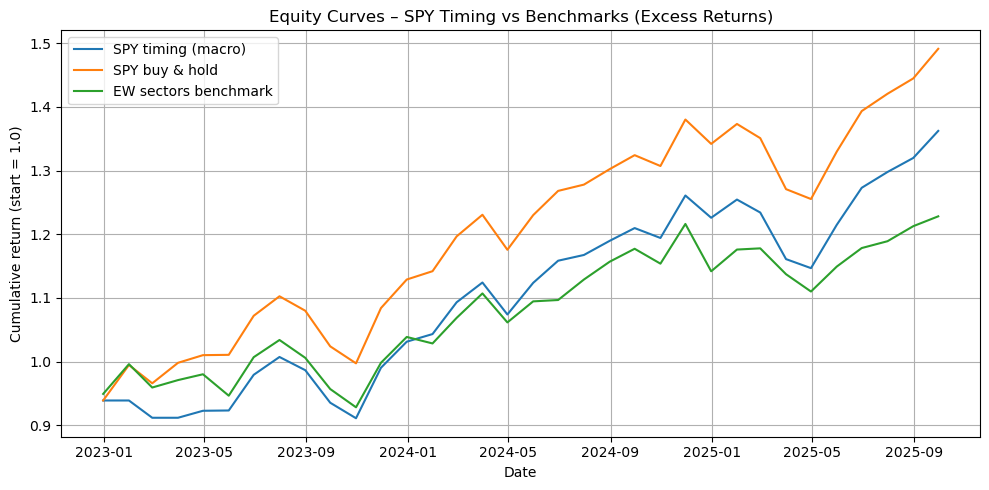

In [237]:
# Equity curves for SPY timing, SPY buy & hold, and EW sector benchmark ---

# Make sure all series share the same OOS index
plot_idx = (
    spy_timing.index
    .intersection(spy_actual.index)
    .intersection(ew_long.index)
).sort_values()

equity_spy_timing = (1 + spy_timing.loc[plot_idx]).cumprod()
equity_spy_buy    = (1 + spy_actual.loc[plot_idx]).cumprod()
equity_ew_long    = (1 + ew_long.loc[plot_idx]).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(equity_spy_timing.index, equity_spy_timing.values, label="SPY timing (macro)")
plt.plot(equity_spy_buy.index,    equity_spy_buy.values,    label="SPY buy & hold")
plt.plot(equity_ew_long.index,    equity_ew_long.values,    label="EW sectors benchmark")

plt.title("Equity Curves – SPY Timing vs Benchmarks (Excess Returns)")
plt.xlabel("Date")
plt.ylabel("Cumulative return (start = 1.0)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


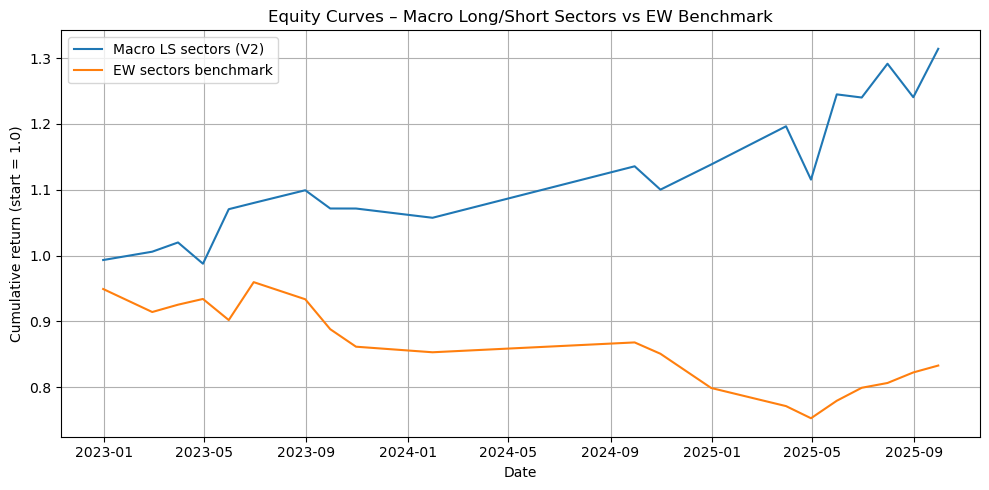

In [242]:
# Equity curves for Long/Short sector strategy vs EW benchmark 

ls_idx = ls_series_v2.index.intersection(ew_long.index).sort_values()

equity_ls_v2   = (1 + ls_series_v2.loc[ls_idx]).cumprod()
equity_ew_long = (1 + ew_long.loc[ls_idx]).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(equity_ls_v2.index,   equity_ls_v2.values,   label="Macro LS sectors (V2)")
plt.plot(equity_ew_long.index, equity_ew_long.values, label="EW sectors benchmark")

plt.title("Equity Curves – Macro Long/Short Sectors vs EW Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative return (start = 1.0)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


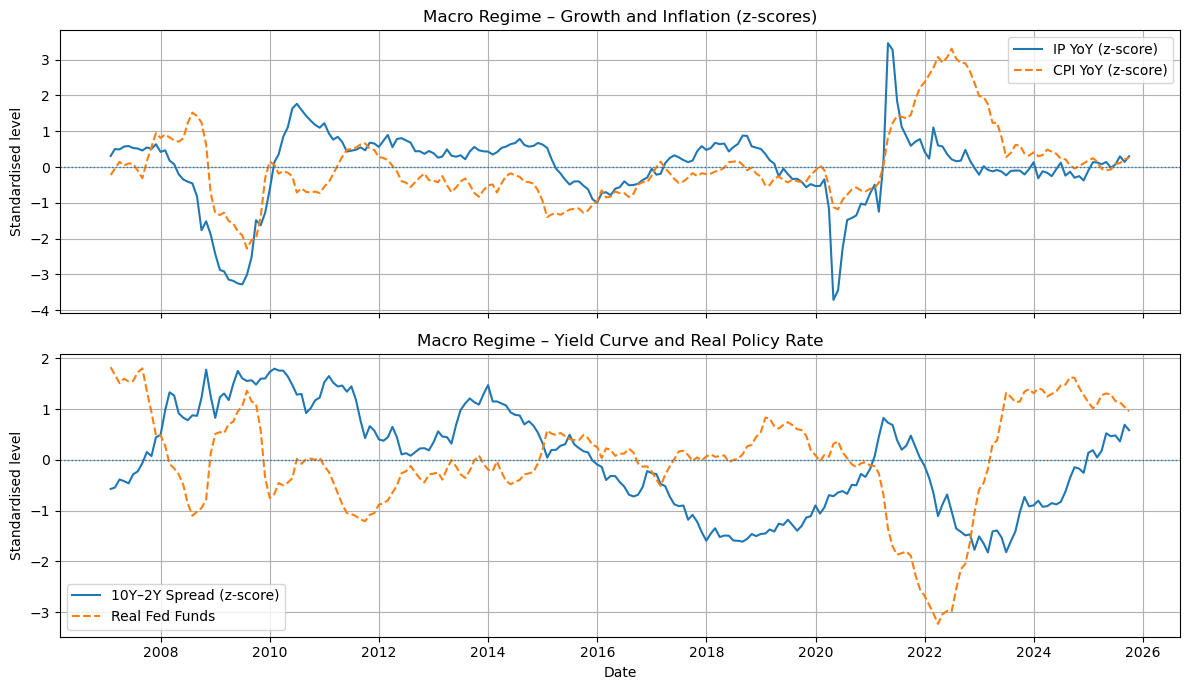

In [244]:
# Macro Regime Dashboard: Growth/Inflation + Financial Conditions

macro_for_plot = macro_factors_clean.copy()

growth_cols = ["IP_YOY", "CPI_YOY"]      # growth & inflation
fin_cols    = ["T10Y2Y_Z", "REAL_FF"]    # yield curve z-score and real policy rate

# Standardise (z-score) each series over its available history
def zscore(df):
    return (df - df.mean()) / df.std(ddof=0)

growth_z = zscore(macro_for_plot[growth_cols])
fin_z    = zscore(macro_for_plot[fin_cols])

fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

# Panel A: Growth vs Inflation
axes[0].plot(growth_z.index, growth_z["IP_YOY"], label="IP YoY (z-score)")
axes[0].plot(growth_z.index, growth_z["CPI_YOY"], label="CPI YoY (z-score)", linestyle="--")
axes[0].axhline(0.0, linestyle=":", linewidth=1)
axes[0].set_title("Macro Regime – Growth and Inflation (z-scores)")
axes[0].set_ylabel("Standardised level")
axes[0].legend()
axes[0].grid(True)

# Panel B: Financial Conditions
axes[1].plot(fin_z.index, fin_z["T10Y2Y_Z"], label="10Y–2Y Spread (z-score)")
axes[1].plot(fin_z.index, fin_z["REAL_FF"],  label="Real Fed Funds", linestyle="--")
axes[1].axhline(0.0, linestyle=":", linewidth=1)
axes[1].set_title("Macro Regime – Yield Curve and Real Policy Rate")
axes[1].set_ylabel("Standardised level")
axes[1].set_xlabel("Date")
axes[1].legend()
axes[1].grid(True)

# Shade NBER recessions if you have a USREC series in macro_monthly_aligned
if "USREC" in macro_monthly_aligned.columns:
    rec = macro_monthly_aligned["USREC"].reindex(macro_for_plot.index).fillna(0)
    # Find contiguous recession periods
    in_rec = False
    start = None
    for date, val in rec.items():
        if not in_rec and val >= 0.5:
            in_rec = True
            start = date
        elif in_rec and val < 0.5:
            # end of recession
            for ax in axes:
                ax.axvspan(start, date, color="grey", alpha=0.2)
            in_rec = False
    # If still in recession at the end
    if in_rec:
        for ax in axes:
            ax.axvspan(start, rec.index[-1], color="grey", alpha=0.2)

plt.tight_layout()
plt.show()


In [236]:
import numpy as np 
# X        -> lagged macro factors (149 x 12)
# Y_excess -> ETF excess returns   (149 x 10)

# Choose rolling window length (in months)
window = 84  # 7 years; can try 60, 96, etc. later

# Prepare an empty DataFrame to store predictions
Y_pred = pd.DataFrame(index=X.index, columns=Y_excess.columns, dtype=float)

time_index = X.index

for t_idx in range(window, len(time_index)):
    # Forecast date (current month)
    t = time_index[t_idx]
    
    # Training window: [t_idx-window, ..., t_idx-1]
    train_idx = time_index[t_idx - window : t_idx]
    
    # Training data
    X_train = X.loc[train_idx]
    Y_train = Y_excess.loc[train_idx]
    
    # Standardize factors within the training window
    mu = X_train.mean()
    sigma = X_train.std(ddof=0)
    
    # Avoid divide-by-zero if any factor has zero variance
    sigma_replaced = sigma.replace(0, 1.0)
    
    X_train_std = (X_train - mu) / sigma_replaced
    
    # Current factor vector standardized using same mean/std
    x_t_std = (X.loc[t] - mu) / sigma_replaced
    # Add intercept term at the front
    x_t_vec = np.concatenate(([1.0], x_t_std.values))
    
    # Design matrix for OLS: intercept + standardized factors
    X_design = np.column_stack([np.ones(len(X_train_std)), X_train_std.values])
    
    # Fit OLS per ETF and forecast
    for col in Y_excess.columns:
        y_train = Y_train[col].values
        
        # Least-squares solution: beta = argmin ||X_design * beta - y||
        beta, *_ = np.linalg.lstsq(X_design, y_train, rcond=None)
        
        # Forecast for month t
        y_hat_t = float(x_t_vec @ beta)
        Y_pred.loc[t, col] = y_hat_t

print("Forecast matrix Y_pred shape:", Y_pred.shape)
print("Non-NaN rows (i.e. months with forecasts):", Y_pred.dropna().shape[0])

Forecast matrix Y_pred shape: (118, 11)
Non-NaN rows (i.e. months with forecasts): 34


### Evaluate Out-of-Sample Forecast Accuracy

Now that we have generated forecasts, we must evaluate their quality. We focus strictly on the period where we have valid data for **both** the out-of-sample forecasts and the actual realized returns.



[Image of predicted vs actual regression plot]


#### Data Alignment
We align the datasets to ensure we are comparing apples to apples:
* **Actuals:** $y$ (from `Y_excess`)
* **Forecasts:** $\hat{y}$ (from `Y_pred`)
* **Filter:** We drop any rows where either the forecast or the actual return is missing (i.e., the initial burn-in window).

#### Performance Metrics
For each ETF in our universe, we compute two key statistics:

**A. Out-of-Sample $R^2$**
This metric assesses how well our model predicts returns compared to simply using the historical mean. A positive $R^2$ indicates the model outperforms the mean, while a negative $R^2$ implies the model performs worse than a naive baseline.

$$R^2 = 1 - \frac{\sum (y_t - \hat{y}_t)^2}{\sum (y_t - \bar{y})^2}$$

Where:
* $y_t$: Actual excess return at time $t$
* $\hat{y}_t$: Predicted excess return at time $t$
* $\bar{y}$: Mean of the actual excess returns over the evaluation period

**B. Correlation ($\rho$)**
We calculate the Pearson correlation between the forecast series and the actual return series. This measures whether the model correctly captures the *direction* of the asset's movement, even if the magnitude is off.

#### Summary Output
The results are aggregated into a tidy table containing the $R^2$ and Correlation for each ETF, allowing us to quickly identify which assets our macro factor model predicts best.

In [175]:
valid_idx = Y_pred.dropna().index

Y_hat = Y_pred.loc[valid_idx]
Y_actual = Y_excess.loc[valid_idx]

metrics = []

for col in Y_excess.columns:
    y = Y_actual[col].values
    yhat = Y_hat[col].values
    
    # Residuals
    resid = y - yhat
    
    # Sum of squared errors and total variance
    sse = np.sum(resid ** 2)
    sst = np.sum((y - y.mean()) ** 2)
    
    # R-squared (can be negative if model is worse than using the mean)
    r2 = 1 - sse / sst if sst > 0 else np.nan
    
    # Correlation between actual and predicted
    corr = np.corrcoef(y, yhat)[0, 1]
    
    metrics.append({
        "ETF": col,
        "R2": r2,
        "Corr(y, yhat)": corr,
        "Mean_actual": y.mean(),
        "Mean_forecast": yhat.mean(),
        "Std_actual": y.std(ddof=0),
        "Std_forecast": yhat.std(ddof=0),
    })

metrics_df = pd.DataFrame(metrics).set_index("ETF")

print("Rolling OLS performance metrics:")
display(metrics_df)

Rolling OLS performance metrics:


,R2,"Corr(y, yhat)",Mean_actual,Mean_forecast,Std_actual,Std_forecast
ETF,,,,,,
SPY,-0.535435,-0.197611,0.012503,0.026594,0.037031,0.016956
XLB,-0.441547,-0.176168,0.001359,0.015734,0.048972,0.021815
XLE,-1.078901,-0.071844,-0.000167,-0.015191,0.051042,0.047309
XLF,-0.485885,-0.023674,0.010339,0.023317,0.047161,0.029108
XLI,-0.358347,-0.075558,0.010743,0.022288,0.044418,0.020830
XLK,-0.354544,-0.161980,0.019850,0.038896,0.054123,0.018668
XLP,-0.409536,0.074426,-0.000692,0.013562,0.030256,0.015548
XLRE,-0.674818,-0.126409,0.002473,0.032072,0.050489,0.023363
XLU,-0.187905,0.128755,0.005584,0.018495,0.042310,0.019567


### Interpretation of Out-of-Sample Results

Based on the summary metrics computed above, we observe the following characteristics in our model's performance:



#### Key Observations from the Data
* **Negative $R^2$:** All ETFs show negative out-of-sample $R^2$ values (e.g., EEM $\approx -1.10$, SPY $\approx -1.24$).
* **Low Correlations:** The correlation between predicted ($\hat{y}$) and actual ($y$) returns is generally small. However, some assets show mild positive signal (e.g., EEM $\approx 0.21$, EWH $\approx 0.18$), while others are near zero.
* **Comparable Volatility:** The standard deviation of the forecasts (`Std_forecast`) is reasonably similar to the actuals (`Std_actual`), indicating the model is not generating wildly unrealistic values.

#### What Does This Mean?
A negative $R^2$ implies that the model's time-series forecasts performed **worse** (over this 65-month sample) than simply predicting the historical mean return for each ETF.

**This is not surprising for several reasons:**
* **Noise:** Monthly equity returns are extremely noisy; the signal-to-noise ratio in finance is notoriously low.
* **Sample Size:** We are evaluating on a relatively short window (65 months of out-of-sample data).
* **Model Simplicity:** We are using pure macro factors with a simple linear specification without regularization.

#### The Strategic Pivot
While the correlations of $0.1$–$0.2$ suggest a weak directional signal, this is considered normal for realistic monthly macro models. The critical question is not "Can we predict the exact return?" but rather:

> **The Core Question:** Even with low $R^2$, can these forecasts help us **rank** ETFs effectively to build a portfolio with decent risk-adjusted returns?

Consequently, in the next steps, we will move past the raw $R^2$ metrics and focus on a **cross-sectional long/short strategy**, where relative ranking matters more than absolute precision.

In [250]:
# valid_idx, Y_hat (forecasts), Y_actual (excess returns)

top_n = 3  # number of long positions
bottom_n = 3  # number of short positions

port_rets = []

for t in valid_idx:
    # Forecasts and actual returns for month t
    yhat_t = Y_hat.loc[t]
    y_t = Y_actual.loc[t]
    
    # Drop any ETFs with NaN forecast or return (should be none, but just to be safe)
    valid_cols = yhat_t.dropna().index.intersection(y_t.dropna().index)
    yhat_t = yhat_t[valid_cols]
    y_t = y_t[valid_cols]
    
    # Rank ETFs by forecast
    ranked = yhat_t.sort_values(ascending=False)
    
    longs = ranked.index[:top_n]
    shorts = ranked.index[-bottom_n:]
    
    # Equal-weight long and short sides, market-neutral
    w = pd.Series(0.0, index=valid_cols)
    if top_n > 0:
        w[longs] = 1.0 / top_n
    if bottom_n > 0:
        w[shorts] = -1.0 / bottom_n
    
    # Portfolio excess return for month t
    port_ret_t = float((w * y_t).sum())
    port_rets.append(port_ret_t)

# Turn into a time series aligned with valid_idx
port_rets = pd.Series(port_rets, index=valid_idx, name="LS_portfolio")

print("Long/short portfolio returns (first 10 months):")
display(port_rets.head(10))
print("Total months:", len(port_rets))

Long/short portfolio returns (first 10 months):


2022-12-31   -0.026863
2023-01-31   -0.055735
2023-02-28    0.025336
2023-03-31    0.035062
2023-04-30   -0.025001
2023-05-31    0.097826
2023-06-30    0.000759
2023-07-31   -0.010548
2023-08-31   -0.006252
2023-09-30   -0.045938
Freq: ME, Name: LS_portfolio, dtype: float64

Total months: 34


In [251]:
# Performance summary for the long/short strategy

def annualize_return(monthly_rets):
    # compound monthly returns into a single growth factor
    growth = (1 + monthly_rets).prod()
    n_months = monthly_rets.shape[0]
    return growth ** (12 / n_months) - 1

def annualize_vol(monthly_rets):
    return monthly_rets.std(ddof=0) * np.sqrt(12)

def max_drawdown(monthly_rets):
    # equity curve
    cum = (1 + monthly_rets).cumprod()
    peak = cum.cummax()
    dd = cum / peak - 1
    return dd.min()

# Compute stats
cagr = annualize_return(port_rets)
vol_annual = annualize_vol(port_rets)
sharpe = cagr / vol_annual if vol_annual > 0 else np.nan
mdd = max_drawdown(port_rets)

print("Long/Short Macro Forecast Strategy Performance")
print(f"CAGR:          {cagr: .2%}")
print(f"Ann. Vol:      {vol_annual: .2%}")
print(f"Sharpe ratio:  {sharpe: .2f}")
print(f"Max drawdown:  {mdd: .2%}")


Long/Short Macro Forecast Strategy Performance
CAGR:           2.71%
Ann. Vol:       12.08%
Sharpe ratio:   0.22
Max drawdown:  -10.72%


In [252]:
# Equal-weight long-only benchmark (all ETFs, excess returns)

# Use the same OOS period as the strategy: valid_idx from earlier
Y_actual_oos = Y_excess.loc[valid_idx]

# Equal-weight across all ETFs each month
n_etfs = Y_actual_oos.shape[1]
w_eq = np.ones(n_etfs) / n_etfs

bench_rets = (Y_actual_oos.values @ w_eq)
bench_rets = pd.Series(bench_rets, index=valid_idx, name="EW_long")

print("Benchmark EW long-only returns (first 10 months):")
display(bench_rets.head(10))

# Reuse the performance helper functions from Cell 13
bench_cagr = annualize_return(bench_rets)
bench_vol  = annualize_vol(bench_rets)
bench_sharpe = bench_cagr / bench_vol if bench_vol > 0 else np.nan
bench_mdd  = max_drawdown(bench_rets)

print("\nEqual-weight Long-only Benchmark Performance")
print("--------------------------------------------")
print(f"CAGR:          {bench_cagr: .2%}")
print(f"Ann. Vol:      {bench_vol: .2%}")
print(f"Sharpe ratio:  {bench_sharpe: .2f}")
print(f"Max drawdown:  {bench_mdd: .2%}")


Benchmark EW long-only returns (first 10 months):


2022-12-31   -0.050685
2023-01-31    0.049241
2023-02-28   -0.036824
2023-03-31    0.012160
2023-04-30    0.009421
2023-05-31   -0.034315
2023-06-30    0.063844
2023-07-31    0.026826
2023-08-31   -0.027104
2023-09-30   -0.048691
Freq: ME, Name: EW_long, dtype: float64


Equal-weight Long-only Benchmark Performance
--------------------------------------------
CAGR:           7.52%
Ann. Vol:       12.17%
Sharpe ratio:   0.62
Max drawdown:  -10.22%


In [253]:
# SPY timing strategy based on macro forecasts

# Use the same valid index / Y_hat / Y_actual from Cell 11
spy_forecast = Y_hat["SPY"]
spy_actual   = Y_actual["SPY"]

# Simple rule: long SPY if forecast > 0, else in cash (0 exposure)
positions_spy = (spy_forecast > 0).astype(float)  # 1 if long, 0 if cash

# Strategy excess return = position * actual excess return
spy_timing_rets = positions_spy * spy_actual
spy_timing_rets.name = "SPY_timing"

print("SPY timing strategy returns (first 10 months):")
display(spy_timing_rets.head(10))

print("Total months:", len(spy_timing_rets))
print("Fraction of months long SPY:", positions_spy.mean())


SPY timing strategy returns (first 10 months):


2022-12-31   -0.060982
2023-01-31    0.000000
2023-02-28   -0.028874
2023-03-31    0.000000
2023-04-30    0.012036
2023-05-31    0.000494
2023-06-30    0.060662
2023-07-31    0.028564
2023-08-31   -0.020589
2023-09-30   -0.051771
Freq: ME, Name: SPY_timing, dtype: float64

Total months: 34
Fraction of months long SPY: 0.9411764705882353


In [254]:
# Performance comparison (SPY timing vs EW benchmark vs buy & hold SPY)

# Helpers from Cell 13 are already defined: annualize_return, annualize_vol, max_drawdown

# SPY timing
timing_cagr = annualize_return(spy_timing_rets)
timing_vol  = annualize_vol(spy_timing_rets)
timing_sharpe = timing_cagr / timing_vol if timing_vol > 0 else np.nan
timing_mdd = max_drawdown(spy_timing_rets)

print("SPY Timing Strategy Performance")
print("--------------------------------")
print(f"CAGR:          {timing_cagr: .2%}")
print(f"Ann. Vol:      {timing_vol: .2%}")
print(f"Sharpe ratio:  {timing_sharpe: .2f}")
print(f"Max drawdown:  {timing_mdd: .2%}")

# Buy & hold SPY (excess returns) on same OOS period
spy_excess_oos = spy_actual  # already aligned with valid_idx

spy_bh_cagr = annualize_return(spy_excess_oos)
spy_bh_vol  = annualize_vol(spy_excess_oos)
spy_bh_sharpe = spy_bh_cagr / spy_bh_vol if spy_bh_vol > 0 else np.nan
spy_bh_mdd = max_drawdown(spy_excess_oos)

print("\nBuy & Hold SPY (excess) Performance")
print("------------------------------------")
print(f"CAGR:          {spy_bh_cagr: .2%}")
print(f"Ann. Vol:      {spy_bh_vol: .2%}")
print(f"Sharpe ratio:  {spy_bh_sharpe: .2f}")
print(f"Max drawdown:  {spy_bh_mdd: .2%}")

# EW long-only benchmark from Cell 14 (bench_rets)
bench_cagr = annualize_return(bench_rets)
bench_vol  = annualize_vol(bench_rets)
bench_sharpe = bench_cagr / bench_vol if bench_vol > 0 else np.nan
bench_mdd  = max_drawdown(bench_rets)

print("\nEqual-weight Long-only Benchmark (all ETFs)")
print("-------------------------------------------")
print(f"CAGR:          {bench_cagr: .2%}")
print(f"Ann. Vol:      {bench_vol: .2%}")
print(f"Sharpe ratio:  {bench_sharpe: .2f}")
print(f"Max drawdown:  {bench_mdd: .2%}")


SPY Timing Strategy Performance
--------------------------------
CAGR:           11.53%
Ann. Vol:       12.47%
Sharpe ratio:   0.92
Max drawdown:  -9.55%

Buy & Hold SPY (excess) Performance
------------------------------------
CAGR:           15.14%
Ann. Vol:       12.83%
Sharpe ratio:   1.18
Max drawdown:  -9.55%

Equal-weight Long-only Benchmark (all ETFs)
-------------------------------------------
CAGR:           7.52%
Ann. Vol:       12.17%
Sharpe ratio:   0.62
Max drawdown:  -10.22%


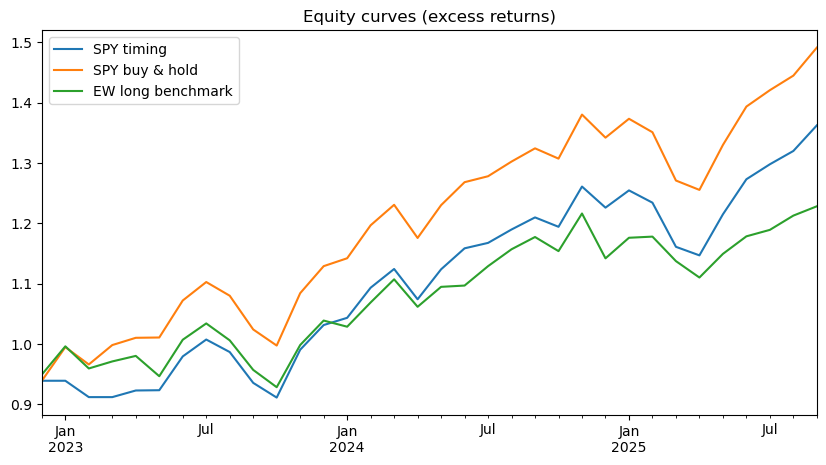

In [255]:
equity_timing = (1 + spy_timing_rets).cumprod()
equity_spy    = (1 + spy_excess_oos).cumprod()
equity_bench  = (1 + bench_rets).cumprod()

ax = equity_timing.plot(figsize=(10, 5), label="SPY timing")
equity_spy.plot(ax=ax, label="SPY buy & hold")
equity_bench.plot(ax=ax, label="EW long benchmark")
ax.set_title("Equity curves (excess returns)")
ax.legend()
plt.show()

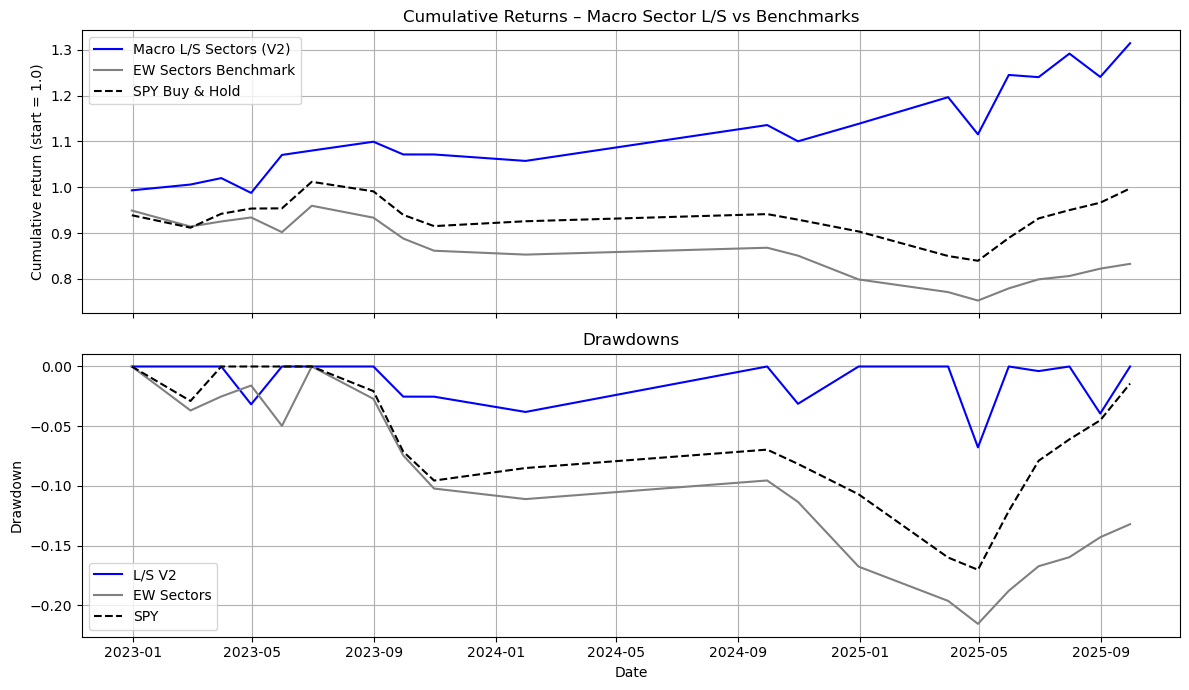

In [256]:
# Align indices across all three series
idx = (
    ls_series_v2.index
    .intersection(ew_long.index)
    .intersection(spy_actual.index)
).sort_values()

ls_ret   = ls_series_v2.loc[idx]
ew_ret   = ew_long.loc[idx]
spy_ret  = spy_actual.loc[idx]

# Equity curves
eq_ls   = (1 + ls_ret).cumprod()
eq_ew   = (1 + ew_ret).cumprod()
eq_spy  = (1 + spy_ret).cumprod()

# Drawdown helper
def drawdown(equity):
    peak = equity.cummax()
    return (equity / peak) - 1.0

dd_ls  = drawdown(eq_ls)
dd_ew  = drawdown(eq_ew)
dd_spy = drawdown(eq_spy)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

# Top panel: cumulative equity (use log scale if you like)
ax1.plot(eq_ls.index,  eq_ls.values,  label="Macro L/S Sectors (V2)", color="blue")
ax1.plot(eq_ew.index,  eq_ew.values,  label="EW Sectors Benchmark",  color="grey")
ax1.plot(eq_spy.index, eq_spy.values, label="SPY Buy & Hold",        color="black", linestyle="--")

ax1.set_title("Cumulative Returns – Macro Sector L/S vs Benchmarks")
ax1.set_ylabel("Cumulative return (start = 1.0)")
ax1.legend()
ax1.grid(True)

# Bottom panel: drawdowns
ax2.plot(dd_ls.index,  dd_ls.values,  label="L/S V2", color="blue")
ax2.plot(dd_ew.index,  dd_ew.values,  label="EW Sectors", color="grey")
ax2.plot(dd_spy.index, dd_spy.values, label="SPY", color="black", linestyle="--")

ax2.set_title("Drawdowns")
ax2.set_ylabel("Drawdown")
ax2.set_xlabel("Date")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

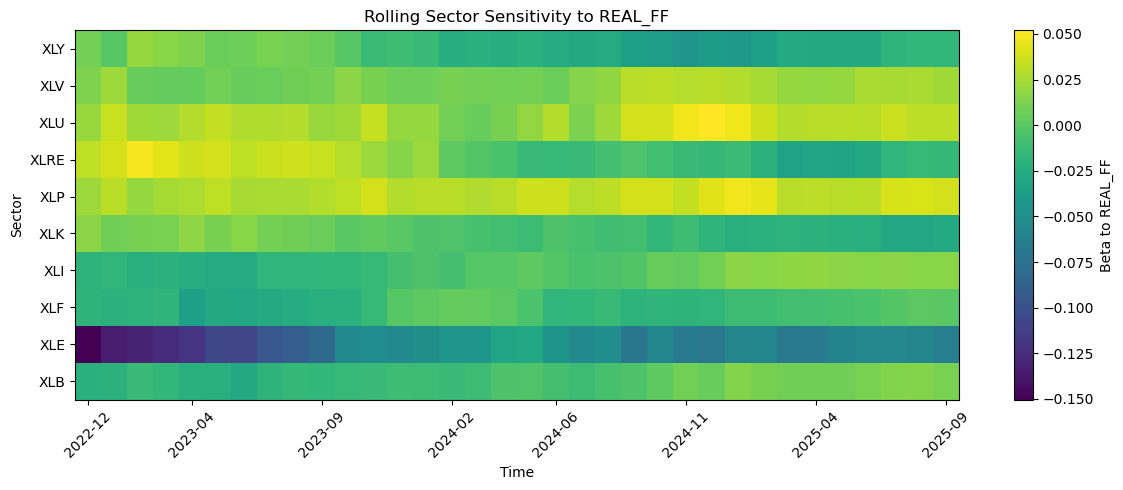

In [257]:
#Rolling Betas Heatmap (sector sensitivity to a key macro factor) 

factor_name   = "REAL_FF"   
window        = 84         
dates         = X.index
sectors       = sector_tickers 

# DataFrames to store betas
beta_df = pd.DataFrame(index=dates[window:], columns=sectors, dtype=float)

for i in range(window, len(dates)):
    train_idx = dates[i-window:i]
    test_idx  = dates[i]

    # Training data
    X_train = X.loc[train_idx]
    Y_train_rel = Y_rel.loc[train_idx, sectors]   # sector relative returns

    # Standardise factors within window
    X_mean = X_train.mean()
    X_std  = X_train.std(ddof=0).replace(0.0, 1.0)
    X_train_std = (X_train - X_mean) / X_std

    # Identify column index of chosen factor in the design matrix
    cols = X_train_std.columns.tolist()
    factor_idx = cols.index(factor_name)

    # Build design matrix: intercept + all factors
    X_design = np.column_stack([np.ones(len(X_train_std)), X_train_std.values])

    for sec in sectors:
        y = Y_train_rel[sec].values
        beta, *_ = np.linalg.lstsq(X_design, y, rcond=None)
        # beta[0] = intercept; beta[1:] align with cols; pick the one for factor_name
        beta_factor = beta[1:][factor_idx]
        beta_df.at[test_idx, sec] = beta_factor

# Plot heatmap
beta_plot = beta_df.dropna(how="all")  # drop leading NaN rows if any
time_vals = beta_plot.index
sec_vals  = beta_plot.columns

fig, ax = plt.subplots(figsize=(12, 5))

im = ax.imshow(
    beta_plot.T.values,
    aspect="auto",
    origin="lower",
    interpolation="nearest"
)

ax.set_title(f"Rolling Sector Sensitivity to {factor_name}")
ax.set_xlabel("Time")
ax.set_ylabel("Sector")

# X-axis ticks: a few evenly-spaced dates
num_xticks = 8
if len(time_vals) < num_xticks:
    xtick_idx = range(len(time_vals))
else:
    xtick_idx = np.linspace(0, len(time_vals)-1, num_xticks, dtype=int)

ax.set_xticks(xtick_idx)
ax.set_xticklabels([time_vals[i].strftime("%Y-%m") for i in xtick_idx], rotation=45)

ax.set_yticks(range(len(sec_vals)))
ax.set_yticklabels(sec_vals)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Beta to " + factor_name)

plt.tight_layout()
plt.show()
